<a href="https://colab.research.google.com/github/hma23/MachineLearning/blob/main/scalabilityRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
#To show all records for our data frame
pd.set_option("display.min_rows", 200)
pd.set_option("display.max_rows", 500)
pd.get_option("display.max_rows")

500

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration and Preprocessing

In [4]:
df = pd.read_excel('/content/drive/MyDrive/data/scale.xlsx')
#uncomment next line to show all values
df.head()

,Time,BlockSize\n with \ncustomization,BlockSize \nwithout\n customization,Scalability \nwith \ncustomization\n(TGL=145000)\n(UTH),Scalability \nwithout \ncustomization\n(TGL=145000),Scalability with customization\n(TGL=23000)\n(UPV),Scalability without customization\n(TGL=23000)
0,1,8.000000e+06,8000000,55.172414,55.172414,347.826087,347.826087
1,2,8.008000e+06,8000000,55.227586,55.172414,348.173913,347.826087
2,3,8.016008e+06,8000000,55.282814,55.172414,348.522087,347.826087
3,4,8.024024e+06,8000000,55.338097,55.172414,348.870609,347.826087
4,5,8.032048e+06,8000000,55.393435,55.172414,349.219480,347.826087


In [5]:
#df.describe()

In [6]:
#sns.heatmap(df.corr(), annot=True)

###Impact of customization on SPumoni scalability


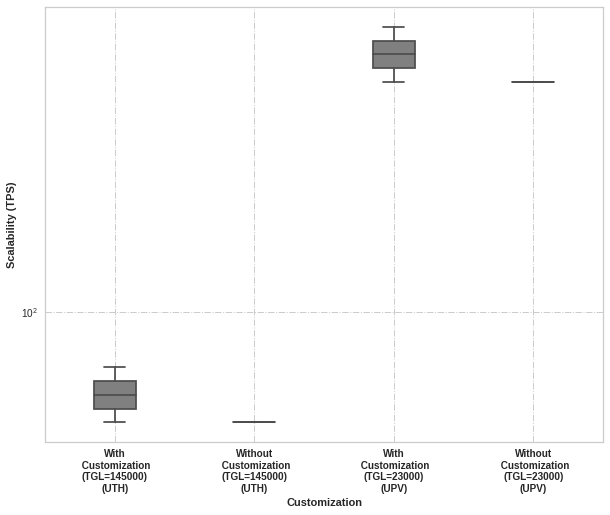

In [22]:
ax=sns.boxplot(data=df.loc[:, ['Scalability \nwith \ncustomization\n(TGL=145000)\n(UTH)', 'Scalability \nwithout \ncustomization\n(TGL=145000)', 'Scalability with customization\n(TGL=23000)\n(UPV)', 'Scalability without customization\n(TGL=23000)']],  color='grey', width=0.3)

ax.grid('both', linestyle='-.')
ax.set_ylabel('Scalability (TPS)', fontweight="bold")
ax.set_xlabel('Customization',fontweight="bold")
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
ax.set_yscale('log')
plt.xticks([0,1, 2, 3], ['With\n Customization\n(TGL=145000)\n(UTH)', 'Without\n Customization\n(TGL=145000)\n(UTH)', 'With\n Customization\n(TGL=23000)\n(UPV)', 'Without\n Customization\n(TGL=23000)\n(UPV)'], fontweight="bold")
plt.figure(figsize=((10,8)))
plt.rcParams["figure.figsize"] = (10,8)

plt.savefig('/content/drive/MyDrive/data/scalablespumoni.eps', format='eps', dpi=1000)
plt.show()

##Impact of customization on elastic block sizes

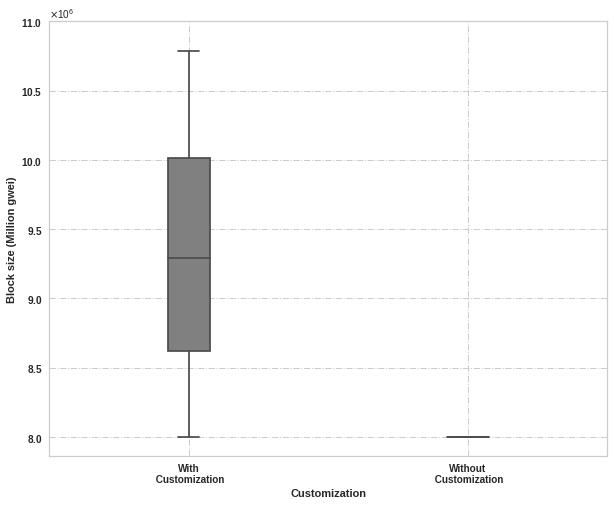

In [23]:
from matplotlib import ticker

ax=sns.boxplot(data=df.loc[:, ['BlockSize\n with \ncustomization', 'BlockSize \nwithout\n customization']],  color='grey', width=0.15)
ax.grid('both', linestyle='-.')
ax.set_ylabel('Block size (Million gwei)', fontweight="bold")
ax.set_xlabel('Customization',fontweight="bold")
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((6,6)) 
ax.yaxis.set_major_formatter(formatter) 

plt.xticks([0,1], ['With\n Customization', 'Without\n Customization'], fontweight="bold")
plt.yticks(np.arange(8000000, 11500000, 500000), fontweight="bold")

plt.figure(figsize=((10,8)))
plt.rcParams["figure.figsize"] = (10,8)
plt.savefig('/content/drive/MyDrive/data/blockscalablespumoni.eps', format='eps', dpi=1000)
plt.show()

### Comparison between different Models

In [9]:
!pip install pycaret

In [10]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [11]:
#read datasheet with desired input features and targets
df_all = df.copy()
exp_reg101 = setup(data = df_all, target = 'Scalability with customization\n(TGL=23000)\n(UPV)', numeric_features = ['BlockSize\n with \ncustomization'], session_id=123, ignore_features = ['Time', 'Scalability \nwith \ncustomization\n(TGL=145000)\n(UTH)', 'Scalability without customization\n(TGL=23000)', 'BlockSize \nwithout\n customization','Scalability \nwithout \ncustomization\n(TGL=145000)'])
##exp_reg101 = setup(data = df_all, target = 'Time', numeric_features = ['Scalability with customization\n(TGL=23000)\n(UPV)'], session_id=123, ignore_features = ['BlockSize\n with \ncustomization' , 'Scalability \nwith \ncustomization\n(TGL=145000)\n(UTH)', 'Scalability without customization\n(TGL=23000)', 'BlockSize \nwithout\n customization','Scalability \nwithout \ncustomization\n(TGL=145000)'])

,Description,Value
0,session_id,123
1,Target,Scalability with customization\n(TGL=23000)\n(...
2,Original Data,"(300, 7)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(209, 1)"


In [12]:
compare_models(n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.626
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.028
lasso,Lasso Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.029
par,Passive Aggressive Regressor,0.0862,0.0075,0.0865,1.0000,0.0002,0.0002,0.025
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.024
et,Extra Trees Regressor,0.0487,0.0053,0.0691,1.0000,0.0002,0.0001,0.370
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.017
en,Elastic Net,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.026
ridge,Ridge Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.016
rf,Random Forest Regressor,0.2647,0.1063,0.3222,0.9999,0.0008,0.0007,0.407


[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
 OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                           normalize=True, precompute='auto', tol=None),
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=123,
       selection='cyclic', tol=0.0001, warm_start=False),
 PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                            epsilon=0.1, fit_intercept=True,
                            loss='epsilon_insensitive', max_iter=1000,
                            n_iter_no_change=5, random_state=123, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1

In [13]:
!pip install shap

##Compare ML algorithm performance for modeling scalability results 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import Lasso
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

#for 5 splits and 5 n_repeates
def RMSE_model(model,X,y):
  cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=123)
  #reg = create_model('lr')
  scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)*-1
  rmse_vals = pd.Series(scores)
  return rmse_vals

##Comparision using RMSE metric (Repeated K fold Crossvalidation)

No handles with labels found to put in legend.


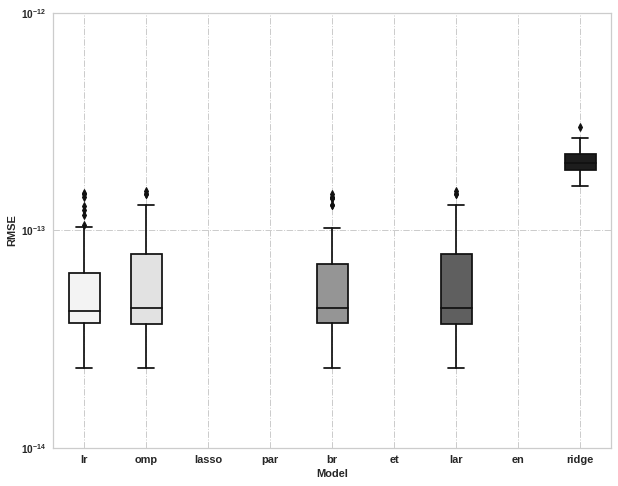

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

df_check = df.copy()
y_sample = df_check[['Scalability with customization\n(TGL=23000)\n(UPV)']]
X_sample = df_check[['BlockSize\n with \ncustomization']]

lr_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
omp_model = OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None, normalize=True, precompute='auto', tol=None)
lasso_model = Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
passiveagg_model = PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False, epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive', max_iter=1000, n_iter_no_change=5, random_state=123, shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
ridge_model = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=False, copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300, normalize=False, tol=0.001, verbose=False)
et_model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1, oob_score=False, random_state=123, verbose=0, warm_start=False)
lar_model = Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True, jitter=None, n_nonzero_coefs=500, normalize=True, precompute='auto', random_state=123, verbose=False)
en_model = ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
ridge2_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=123, solver='auto', tol=0.001)

models = {'lr':lr_model, 'omp':omp_model, 'lasso':lasso_model, 'par':passiveagg_model,'br':ridge_model,'et':et_model, 'lar':lar_model, 'en':en_model, 'ridge':ridge2_model}
#models = {'lr':lr_model,'par':passiveagg_model,'et':et_model }
r2_fe = pd.DataFrame()

for model_key,model_val in models.items():
  r2_fe[f'{model_key}'] = RMSE_model(model_val,X_sample,y_sample)
rmse_all=pd.melt(r2_fe)

#plotting our rmse plot
ax = sns.boxplot(x="variable", y="value", hue=None, data=rmse_all, palette="Greys",width=.5)
ax.grid('both', linestyle='-.')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
plt.legend(loc='upper left')
plt.ylabel('RMSE', fontweight="bold")
plt.xlabel('Model', fontweight="bold")
plt.xticks(fontweight="bold", fontsize=11)
plt.yticks(fontweight="bold")
plt.yscale('log')
ax.set_ylim(10e-15, 10e-13)

# formatter = ticker.ScalarFormatter(useMathText=False)
# formatter.set_scientific(False) 
# ax.yaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_formatter(ScalarFormatter())


#set plot display size
# plt.figure(figsize=((10,8)))
# plt.rcParams["figure.figsize"] = (10,8)

plt.savefig('/content/drive/MyDrive/data/RMSEspumoni.eps', format='eps', dpi=1000)
plt.show()